# Bootstrap

Bootstrap is a method to estimate the distribution of a statistic by resampling. Let $\theta$ be a statistic that is a function of $X$, where $X$ is a sample of size $n$, i.e. $X_1, X_2, ..., X_n$. 

Thus, 

$$
\theta = f(X_1, X_2, ..., X_n)
$$

The idea behind bootstrap method is to make copies of $X$ and calculate $\theta$ from each copy of $X$. Each copy should have the same size as the original $X$ sample. If we have $c$ copies of $X$, then we'll have $c$ different estimates of $\theta$. These estimates will form a distribution and we can make inference from that distribution.

Note that when we make copies of $X$ by random sampling, the sampling has to be done **with replacement**. This is what we called resampling. These copies are known as *bootstrap samples*. 

Retrieved from: 

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An introduction to statistical learning with applications in R* (2nd ed.). Springer.

***

## Exercises

### Exercise 1.0

#### How many distinct bootstrap samples can be formed from the original sample $X$ of size $n$?

Suppose we have an initial sample $X$ of size $n$. Each bootstrap sample is created by taking random draws from the original sample with replacement. So, each data point of the initial sample can be chosen any number of times. Let $k_i$ be the count that a point $X_i$ is chosen. Then:

$$
\sum_{i = 1}^{n} k_i = n
$$

Thus, the sample $\{X_1, X_2, ..., X_n \}$ can be expressed in terms of the frequencies of the counts $\{k_1, k_2, ..., k_n \}$ corresponding to each point $X_i$.

Consequently, the problem now involves determining the number of possible ways to partition $n$ elements, as the number of elements remains consistent for each bootstrap sample.

Then, our problem can be represented using a dot-bar system, in which the dots symbolize the elements and each bar signifies a partition. This can be illustrated as follows.

In [13]:
n <- 4
y <- rep(0, 2 * n - 1)
y[sample.int(2 * n - 1, n - 1, replace = FALSE)] <- 1
names(y) <- c("_","|")[y + 1]
print(y)

_ | _ _ | _ | 
0 1 0 0 1 0 1 


$\qquad$ **Note**: the bootstrap samples $X^{*}_{j} = \{X_2, X_2, X_3 \}$ and $X^{*}_{k} = \{X_2, X_3, X_2 \}$ are the same.

The number of dots between the bars (or between the 1's) indicates the frequency with which the point $X_i$ is selected. Consequently, the number of dots after the last bar represents how many times the last data point from the original data is chosen.

From the system shown above, it's clear that there are $n - 1$ bars. Therefore, the problem simplifies to answering the following question: in how many distinct ways can we assign the positions of $n$ dots so that each assignment is unique? Given that we have n$n$ dots and $n − 1$ bars (totaling $2n − 1$ elements), the number of ways to arrange the dots is given by:

$$
\binom{2n - 1}{n}
$$

#### What is the probability that a bootstrap sample is exactly the same as the original sample?

For each position $(i = 1, 2, \ldots, n)$, we can select any of the $n$ elements, which implies that there are $n^n$ ways to assign $n$ elements to $n$ positions independently.

On the other hand, if we consider the number of distinct ways to arrange $n$ elements without repetition, we obtain:

$$
n(n - 1)(n - 2)(n - 3) \ldots (2)(1) = n!
$$

Thus, the probability that a bootstrap sample is identical to the original one is:

$$
\frac{1}{n^n} n! = \frac{n!}{n^n}
$$

#### What is the most likely bootstrap sample to be selected?

The most likely bootstrap sample $X^{*}$, is the one that has the highest number of permutations; i.e. the one that offers the maximum number of ways in which its elements can be arranged.

Given this, the bootstrap sample with the greatest number of permutations is composed of all distinct elements $X^{*}$, making it equivalent to the original sample $\{X_1, X_2, ..., X_n \}$. This is because the presence of even a single repeated element would decrease the total number of possible permutations.

To elaborate further, when an element is repeated within a set, the number of ways to organize that set becomes limited. This is because the positions occupied by identical elements are indistinguishable from each other; e.g. in the set $(2,2,3)$, swapping the two elements $2$ doesn't result in a new permutation since they are identical.

Therefore, **the most likely bootstrap sample** is the one composed of each of the unique elements from the original sample, without repetitions. This configuration maximizes the number of ways in which the elements can be arranged.

#### What is the average number of times an element is selected in a bootstrap sample?

Since each bootstrap sample is generated by randomly sampling from the original sample **with replacement**, a single element can be selected more than once. This means that selecting an element is analogous to a Bernoulli experiment, where a "success" occurs when we select the desired element $X_i$, and a "failure" occurs when we select any other element different from $X_i$.

In any given draw from the original sample of size $n$, the probability of selecting a specific element $X_i$ is $\frac{1}{n}$. For a bootstrap sample of size $n$, there are $n$ draws, with each draw having the same probability of selecting $X_i$, since each draw is **independent and with replacement**.

Given the nature of this sampling, each bootstrap sample follows a **multinomial distribution**. Thus, the expected number of times $X_i$ is selected is:

$$
E[X_i] = n*p_i = n(\frac{1}{n}) = 1
$$

This means that, on average, each element from the original sample is selected once in a bootstrap sample.

### Exercise 2.0

Let $ x_1, x_2, ..., x_n $ be a random sample from a normal distribution $ N(\theta, 1) $ and suppose that $ \bar{x} $ is an estimator of $ \theta $.

Let $ X_{1}^{*}, X_{2}^{*}, ..., X_{n}^{*} $ be a bootstrap sample from $ N(\bar{x}, 1) $. Show that $ \bar{X} - \theta $ and $ \bar{X}^{*} - \bar{x} $ have the same distribution $N(0, 1/n)$.

Since $x_1, x_2, ..., x_n$ follow a distribution $N(\theta, 1)$, then each variable $x_{i}$:

$
E[x_i] = \theta \quad \text{and} \quad Var(x_i) = 1
$

Therefore, the sample mean $\bar{X}$ defined as:

$
\bar{X} = \frac{1}{n} \sum_{i = 1}^{n} x_{i}
$

is a sum of $n$ variables $x_i \sim N(\theta, 1)$.


Therefore:

$
E[\bar{X}] = E\left[ \frac{1}{n} \sum_{i = 1}^{n} x_{i} \right] = \frac{1}{n} \sum_{i = 1}^{n} E[x_{i}] = \frac{1}{n}(n)(\theta) = \theta
$

and

$\begin{aligned}
Var(\bar{X}) = Var\left( \frac{1}{n} \sum_{i = 1}^{n} x_{i} \right) &= E[(\frac{1}{n} \sum_{i = 1}^{n} x_{i} - E[\frac{1}{n} \sum_{i = 1}^{n} x_{i}])^{2}]\\
&= E[\frac{1}{n^{2}}(\sum_{i = 1}^{n} x_{i} - E[\sum_{i = 1}^{n} x_{i}])^{2}]\\
&= \frac{1}{n^{2}}E[(\sum_{i = 1}^{n} x_{i} - E\sum_{i = 1}^{n} x_{i})^{2}]\\
&= \frac{1}{n^{2}}Var(\sum_{i = 1}^{n} x_i)\\
&= \frac{1}{n^{2}}(n)(1)\\
&= \frac{1}{n}
\end{aligned}$

Thus, if the estimator $\bar{X} \sim N(\theta, \frac{1}{n})$, then:

$
\bar{X} - \theta \sim N(0, \frac{1}{n})
$

On the other hand, the bootstrap sample mean $\bar{X}^{*}$ defined as:

$$
\bar{X}^{*} = \frac{1}{n} \sum_{i = 1}^{n} X_{i}^{*}
$$

is the sum of $n$ variables $X_{i}^{*} \sim N(\bar{x}, 1)$.

Then:

$$
E[\bar{X}^{*}] = E\left[ \frac{1}{n}\sum_{i = 1}^{n} X_{i}^{*} \right] = \frac{1}{n}\sum_{i = 1}^{n} E[X_i^{*}] = \frac{1}{n}(n)(\bar{x}) = \bar{x}
$$

and

$\begin{aligned}
Var(\bar{X}^{*}) = Var\left( \frac{1}{n}\sum_{i = 1}^{n}X_{i}^{*} \right) &= E[(\frac{1}{n}\sum_{i = 1}^{n}X_{i}^{*} - E[\frac{1}{n}\sum_{i = 1}^{n}X_{i}^{*}])^{2}]\\
&= E[\frac{1}{n^{2}}(\sum_{i = 1}^{n}X_{i}^{*} - E[\sum_{i = 1}^{n}X_{i}^{*}])^{2}]\\
&= \frac{1}{n^{2}}E[(\sum_{i = 1}^{n}X_{i}^{*} - E[\sum_{i = 1}^{n}X_{i}^{*}])^{2}]\\
&= \frac{1}{n^{2}}Var(\sum_{i = 1}^{n}X_{i}^{*})\\
&= \frac{1}{n^{2}}(n)(1)\\
&= \frac{1}{n}
\end{aligned}$

From the above, the estimator $\bar{X}^{*} \sim N(\bar{x}, \frac{1}{n})$, therefore:

$$
\bar{X}^{*} - \bar{x} \sim N(0, \frac{1}{n})
$$

In this way, it is shown that $\bar{X} - \theta$ and $\bar{X}^{*} - \bar{x}$ follow a normal distribution with parameters $N(0, 1/n)$.

### Exercise 3.0

Consider the dataset

$$
2, 5, 3, 9.
$$

Let $x_{1}^{*}, x_{2}^{*}, x_{3}^{*}, x_{4}^{*}$ be a bootstrap sample of this dataset.

- Find the probability that the average of the bootstrap sample is equal to 2.
- Find the probability that the average of the bootstrap sample is equal to 9.
- Find the probability that the average of the bootstrap sample is equal to 4.

Given the dataset $X$, the size of each bootstrap sample will be 4 observations, which will be selected from this dataset.

Let $\bar{X}^{*}$ be the average of the bootstrap sample:

$\qquad$ $\bullet ~$ We are interested in the value of $\bar{X}^{*}$ being equal to $2$, that is:

$$
\frac{x_{1}^{*} + x_{2}^{*} + x_{3}^{*} + x_{4}^{*}}{4} = 2
$$

Multiplying both sides by 4:

$$
x_{1}^{*} + x_{2}^{*} + x_{3}^{*} + x_{4}^{*} = 8
$$

Therefore, we must consider each of the possible combinations such that the sum $x_{1}^{*} + x_{2}^{*} + x_{3}^{*} + x_{4}^{*}$ equals 8.

Considering the dataset, the only possible combination that satisfies the condition is $x_{1}^{*} = x_{2}^{*} = x_{3}^{*} = x_{4}^{*} = 2$.

Thus, the probability that the average of the bootstrap sample is equal to 2 is:

$$
P(\bar{X}^{*} = 2) = \frac{1}{P(n, r)} = \frac{1}{n^r}
$$

$\qquad$ where $P(n, r)$ represents the distinct bootstrap samples from the dataset with $n = 4$ and $r = 4$.

Therefore:

$$
P(\bar{X}^{*} = 2) = \frac{1}{(4)^4} = \frac{1}{256}
$$

$\qquad$ $\bullet ~$ Considering the case where $\bar{X}^{*}$ is equal to $9$, then:

$$
\frac{x_{1}^{*} + x_{2}^{*} + x_{3}^{*} + x_{4}^{*}}{4} = 9
$$

Solving, we get:

$$
x_{1}^{*} + x_{2}^{*} + x_{3}^{*} + x_{4}^{*} = 36
$$

That is, we must consider each of the possible combinations such that the sum $x_{1}^{*} + x_{2}^{*} + x_{3}^{*} + x_{4}^{*}$ equals 36.

Similar to the previous case, the only combination that satisfies the condition is $x_{1}^{*} = x_{2}^{*} = x_{3}^{*} = x_{4}^{*} = 9$. Considering the distinct bootstrap samples given the value of $n = 4$ and $r = 4$, the probability that the average of the bootstrap sample is equal to 9 is:

$$
P(\bar{X}^{*} = 9) = \frac{1}{(4)^4} = \frac{1}{256}
$$


$\qquad$ $\bullet ~$ Finally, considering $\bar{X}^{*}$ equal to $4$, then:

$$
\frac{x_{1}^{*} + x_{2}^{*} + x_{3}^{*} + x_{4}^{*}}{4} = 4
$$

Multiplying both sides by 4:

$$
x_{1}^{*} + x_{2}^{*} + x_{3}^{*} + x_{4}^{*} = 16
$$

That is, we must consider each of the possible combinations such that the sum $x_{1}^{*} + x_{2}^{*} + x_{3}^{*} + x_{4}^{*}$ equals 16.

In this case, there are two possible combinations that satisfy the condition:

- Combination 1: ($x_{1}^{*} = 9, x_{2}^{*} = 3, x_{3}^{*} = 2, x_{4}^{*} = 2$)
- Combination 2: ($x_{1}^{*} = 5, x_{2}^{*} = 5, x_{3}^{*} = 3, x_{4}^{*} = 3$)

From which we can consider 12 and 6 different ways to arrange the elements, respectively. Thus, the probability that the average of the bootstrap sample is equal to 4 is:

$$
P(\bar{X}^{*} = 4) = \frac{12}{(4)^4} + \frac{6}{(4)^4} = \frac{18}{256}
$$


### Exercise 4.0

Maximize the following functions using the simulated annealing algorithm.

a) Function no. 1

$$
f(x, y, \alpha, \beta) = \frac{sin^{2}[(x + \alpha)^{2} + (y + \beta)^{2}] - 0.5}{[1.0 + 0.001 * ((x + \alpha)^{2}) + (y + \beta)^{2})]^{2}}
$$

$$
-100 \leq x \leq 100
$$

$$
-100 \leq y \leq 100
$$

$$
-\infty \leq \alpha \leq \infty
$$

$$
-\infty \leq \beta \leq \infty
$$

a) Function no. 2

$$
f(x, y) = 21.5 + xsin(4\pi x) + ysin(20 \pi y)
$$

$$
-3.0 \leq x \leq 12.1
$$

$$
4.1 \leq y \leq 5.8
$$


***

Maximize the function:

$$
f(x, y, \alpha, \beta) = \frac{\sin^{2}[(x + \alpha)^{2} + (y + \beta)^{2}] - 0.5}{[1.0 + 0.001 \cdot ((x + \alpha)^{2}) + (y + \beta)^{2}]^{2}}
$$

$\quad$ subject to:

$$
-100 \leq x \leq 100
$$

$$
-100 \leq y \leq 100
$$

$$
-\infty \leq \alpha \leq \infty
$$

$$
-\infty \leq \beta \leq \infty
$$


In [29]:
h <- function(x, y, a, b){
    (sin((x + a)^2 + (y + b)^2)^2 - 0.5)/((1 + 0.001 * (x + a)^2 + (y + b)^2)^2)
} # objective function

In [30]:
# Setting parameters

x0 <- 0.99 # initial x and y points
y0 <- 0.99
a0 <- 0.25 # a and b values
b0 <- 0.30

n <- 5000 # no. of iterations
s <- 0.1 # small perturbation value to generate random nearby points

h0 <- h(x0, y0, a0, b0) # value of h function at initial point (x0, y0, a, b)
z <- matrix(0, n, 6) ; z[1,] <- c(x0, y0, h0, 1, a0, b0) # matrix to store x, y, h, r, a, and b values
rem <- c() # vector to store rejected iterations

In [31]:
for(i in 2:n){
  ti <- 1/(log(1 + i)) # temperature parameter
  xt <- runif(1, x0 - s, x0 + s) # new point (xt, yt)
  yt <- runif(1, y0 - s, y0 + s)
  if(xt < -100 || xt > 100 || yt < -100 || yt > 100){ # constraint
    rem <- c(rem,i) # if new point goes outside the bounds -100 to 100 it is skipped
    next 
  }
  at <- s + runif(1, -10, 10) # update a and b values
  bt <- s + runif(1, -10, 10)  
  ht <- h(xt, yt, at, bt) # h function evaluated at new point (xt, yt, a, b)
  dh <- h0 - ht # diff between previous and current h values
  r <- min(exp(dh/ti), 1) # update r value based on the difference and the temperature parameter
    
  if(runif(1) < r){ # accept/update or reject the current point
    x0 <- xt
    y0 <- yt
    h0 <- ht
    a0 <- at
    b0 <- at
    z[i,] <- c(xt, yt, ht, r, at, bt)
  }
  else{
    z[i,] <- c(x0, y0, h0, r, a0, b0)
  }
}

In [32]:
head(z) # matrix preview

0.9900000,0.990000,-6.985896e-02,1.0000000,0.250000,0.3000000
1.0187372,1.058638,2.557553e-05,0.9260973,4.046557,7.8277270
0.9355680,1.102946,1.305484e-05,1.0000000,2.945189,9.0651685
0.9621313,1.148216,6.118230e-04,0.9990368,8.816031,3.6061303
0.9814068,1.217007,3.833078e-02,0.9346499,9.305400,0.3567262
0.9801906,1.155564,2.830121e-05,1.0000000,1.126147,-5.4393114


In [33]:
(z[5000,][3])*-1 # final h value

[1] 2.329873e-05

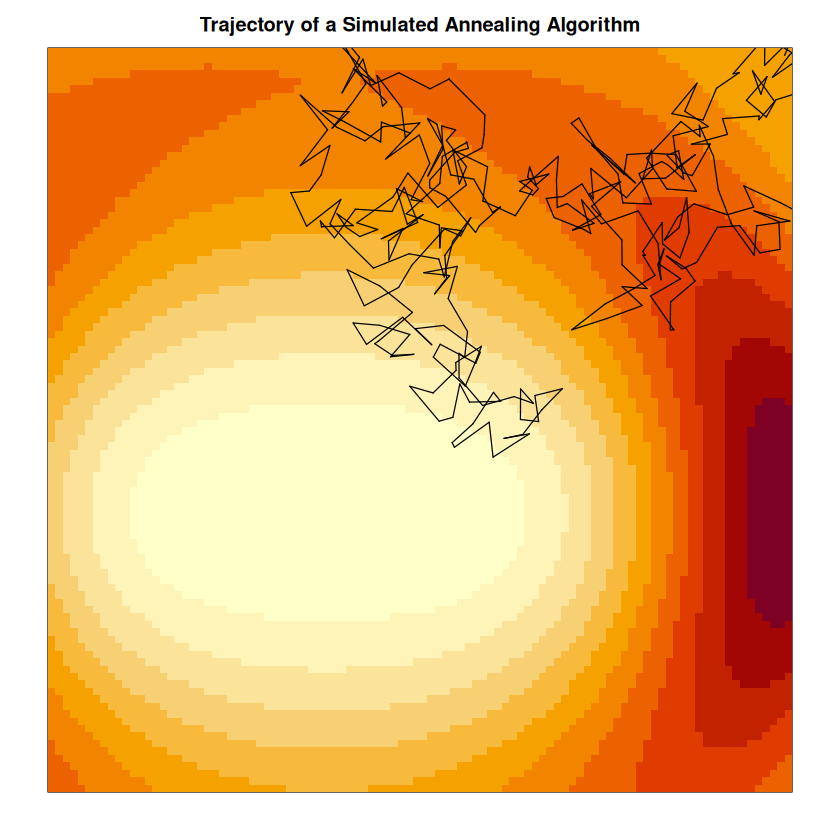

In [34]:
m <- nrow(z)
x <- y <- seq(-1, 1, length = 100)
zi <- outer(x, y, "h", 0.25, 0.25) ; par(mar = c(2, 2, 2, 2))
image(x, y, zi, xaxt = "n", yaxt = "n", ylab = "", xlab = "", cex.main = 1,
main = "Trajectory of a Simulated Annealing Algorithm")
for(i in 1:(m-1)){segments(z[i,1], z[i,2], z[i+1,1], z[i+1,2])}

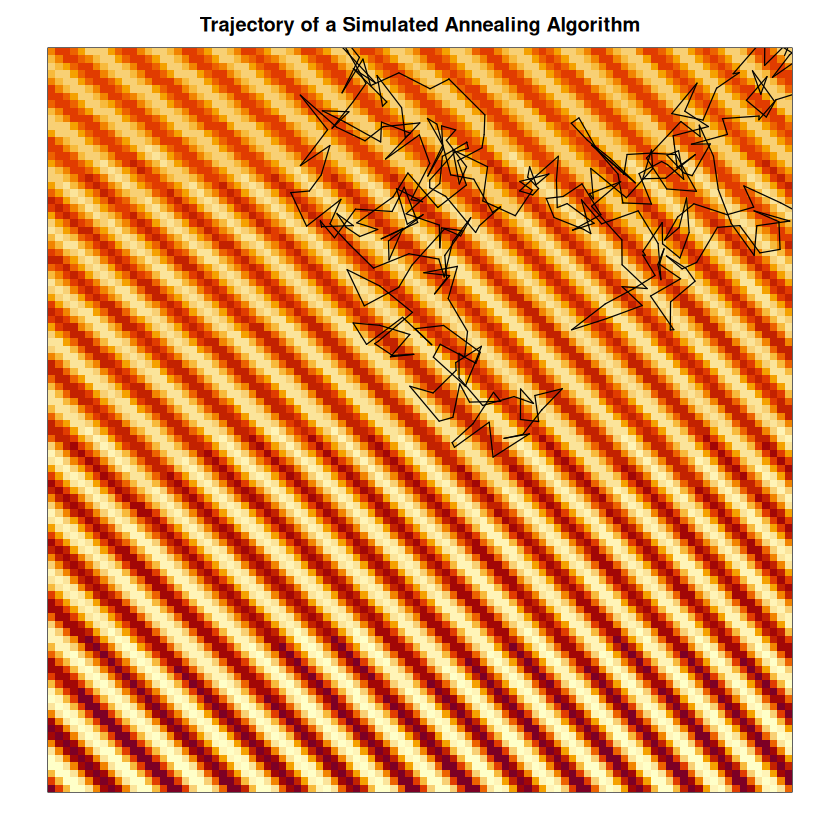

In [35]:
m <- nrow(z)
x <- y <- seq(-1, 1, length = 100)
zi <- outer(x, y, "h", 10, 10) ; par(mar = c(2, 2, 2, 2))
image(x, y, zi, xaxt = "n", yaxt = "n", ylab = "", xlab = "", cex.main = 1,
main = "Trajectory of a Simulated Annealing Algorithm")
for(i in 1:(m-1)){segments(z[i,1], z[i,2], z[i+1,1], z[i+1,2])}

***

Maximize the function:

$$
f(x, y) = 21.5 + x \sin(4\pi x) + y \sin(20 \pi y)
$$

$\quad$ subject to:

$$
-3.0 \leq x \leq 12.1
$$

$$
4.1 \leq y \leq 5.8
$$

In [9]:
h <- function(x, y){
    21.5 + (x * sin(4 * pi * x)) + (y * sin(20 * pi * y))
} # objective function

In [10]:
# Setting parameters

x0 <- runif(1, -3, 12.1) # initial x and y points
y0 <- runif(1, 4.1, 5.8)

n <- 5000 # no. of iterations
s <- 0.1 # small perturbation value to generate random nearby points

h0 <- h(x0, y0) # value of h function at initial point (x0, y0, a, b)
z <- matrix(0, n, 4) ; z[1,] <- c(x0, y0, h0, 1) # matrix to store x, y, h, r, a, and b values
rem <- c() # vector to store rejected iterations

In [11]:
for(i in 2:n){
  ti <- 1/(log(1 + i)) # temperature parameter
  xt <- runif(1, x0 - s, x0 + s) # new point (xt, yt)
  yt <- runif(1, y0 - s, y0 + s)
  if( xt < -3 || xt > 12.1 || yt < 4.1 || yt > 5.8 ){ # constraint
    rem <- c(rem,i) # if new point goes outside the bounds it is skipped
    next 
  }
  ht <- h(xt, yt) # h function evaluated at new point (xt, yt, a, b)
  dh <- h0 - ht # diff between previous and current h values
  r <- min(exp(dh/ti), 1) # update r value based on the difference and the temperature parameter
    
  if(runif(1) < r){ # accept/update or reject the current point
    x0 <- xt
    y0 <- yt
    h0 <- ht
    z[i,] <- c(xt, yt, ht, r)
  }
  else{
    z[i,] <- c(x0, y0, h0, r)
  }
}

In [12]:
head(z) # matrix preview

3.311943,4.755144,17.66440,1.0000000000
3.311943,4.755144,17.66440,0.0150450609
3.354261,4.693559,16.41105,1.0000000000
3.354261,4.693559,16.41105,0.0001618467
3.354261,4.693559,16.41105,0.0003243028
3.354261,4.693559,16.41105,0.0002793612


In [13]:
(z[5000,][3])*-1 # final h value

[1] -12.45257

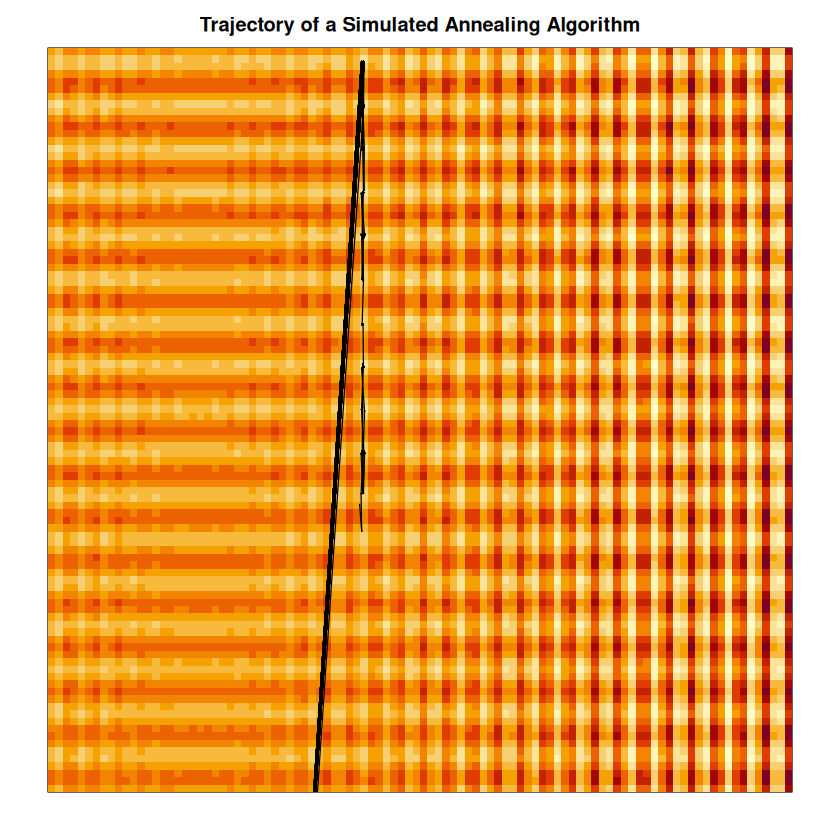

In [14]:
m <- nrow(z)
x <- seq(-3, 12.1, length = 100)
y <- seq(4.1, 5.8, length = 100)
zi <- outer(x, y, "h") ; par(mar = c(2, 2, 2, 2))
image(x, y, zi, xaxt = "n", yaxt = "n", ylab = "", xlab = "", cex.main = 1,
main = "Trajectory of a Simulated Annealing Algorithm")
for(i in 1:(m-1)){segments(z[i,1], z[i,2], z[i+1,1], z[i+1,2])}

***

From the graphs shown previously, we can observe the trajectory of the algorithm, represented by the line segments drawn between the points of the matrix $z$. Each point corresponds to a state or solution in the search space, and the segments show how the algorithm moves from one point to the next during the search.

The graphs illustrate the intrinsic nature of the algorithm, which delves into the search space that is expected to contain multiple local optima. In this context, the values found for both functions $h$ represent a point of interest that could be a local maximum, although its position in the search space **does not guarantee that it is the global optimum**.


It is important to consider that, although the values obtained from $h$ may be significant, their nature as local maxima implies that there could be better solutions in the search space.

***

MSc Statistical Computing by Mathematics Research Center (CIMAT Monterrey)

September 2024